# For Heatmaps

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


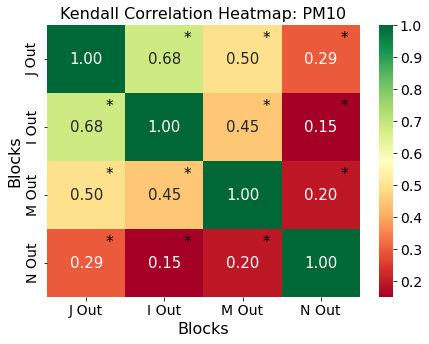

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.font_manager as font_manager

def calculate_correlation(csv_files, column, custom_names, save_path=None):
    data = {}

    for i, file in enumerate(csv_files):
        df = pd.read_csv(file)
        values = df[column]
        data[custom_names[i]] = values

    df_correlation = pd.DataFrame(data)

    correlation_matrix = df_correlation.corr(method='kendall')
    p_values = df_correlation.corr(method=lambda x, y: stats.kendalltau(x, y).pvalue).values
    print(p_values)

    fig, ax = plt.subplots(figsize=(7, 5))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlGn", annot_kws={"fontsize": 15})

    for i in range(correlation_matrix.shape[0]):
        for j in range(correlation_matrix.shape[1]):
            if i != j and correlation_matrix.iloc[i, j] != 0:
                p_value = p_values[i, j]
                if p_value < 0.05:
                    plt.text(j + 0.8, i + 0.2, "*", color="Black", ha="center", va="center", fontsize=15)

    font_prop = font_manager.FontProperties(size=14)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)

    plt.xlabel("Blocks", fontsize=16)
    plt.ylabel("Blocks", fontsize=16)
    plt.title(f"Kendall Correlation Heatmap: PM10", fontsize=16)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")

    plt.show()

csv_files = ['J_outdoor.csv', 'I_outdoor.csv', 'M_outdoor.csv', 'N_outdoor.csv']
column = 'pm10'
custom_names = ['J Out', 'I Out', 'M Out', 'N Out']
save_path = 'correlation_heatmap_pm10.png'

calculate_correlation(csv_files, column, custom_names, save_path)


# For Boxplots 

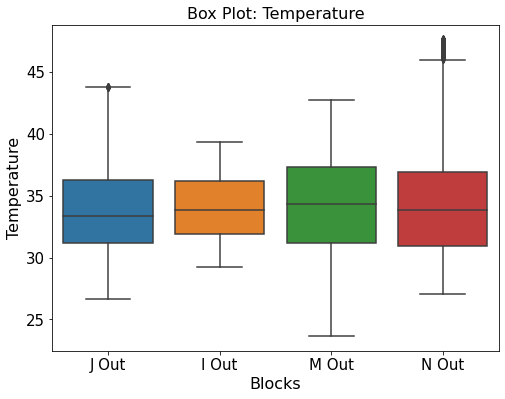

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot(csv_files, column, custom_names, save_path=None):
    data = []


    for i, file in enumerate(csv_files):
        df = pd.read_csv(file)
        values = df[column]
        data.append(values)


    df_boxplot = pd.DataFrame(data).T
    df_boxplot.columns = custom_names

    plt.figure(figsize=(8, 6))

    sns.boxplot(data=df_boxplot)
    plt.xlabel('Blocks', fontsize=16)
    plt.ylabel('Temperature', fontsize=16)
    plt.title('Box Plot: Temperature', fontsize=16)

    plt.xticks(fontsize=15)

    ytick_labels = plt.gca().get_yticklabels()
    for label in ytick_labels:
        label.set_fontsize(15)

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

csv_files = ['J_outdoor.csv', 'I_outdoor.csv', 'M_outdoor.csv', 'N_outdoor.csv']
column = 'temp'
custom_names = ['J Out', 'I Out', 'M Out', 'N Out']
save_path = 'boxplot_temp.png'

plot_boxplot(csv_files, column, custom_names, save_path)
